<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%99%9C%EC%9A%A9_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning
 - Machine Learning과 다르게 처음부터 답을 알려주지 않는다
 - Data만 받아서 자체적으로 답을 알 수 있도록

비지도학습: Target이 없는 Data를 사용하는 것
No target? = 정답 X -> algorism이 예측을 해야 한다



In [5]:
# MBC마켓에서 이벤트 진행 개시
# 본인이 구매한 과일 사진을 homepage에 upload하면 추첨해서 상품 제공 예정

# 고객이 올린 사진을 학습하여 과일 분류 해보기
# with 비지도 학습(Unsuspervised Learning)
# 직접 가르치지 않아도 Data에 있는 무언가를 학습한다

# 비법 : 사진의 pixel 값을 모두 평균내면 비슷한 과일끼리 모일까?
# 과일 사진 300개를 준비하여 분류해보자

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-01-08 01:37:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-08 01:37:18--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-08 01:37:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')

In [12]:
print(fruits.shape)
# sample 개수, 이미지 높이, 이미지 너비 -> 해상도 100 * 100인 사진 300장
# https://www.kaggle.com/ - 이곳의 dataset

(300, 100, 100)


In [18]:
print(fruits[0,0,:]) # 0번행 0번열의 모든 값 - 흑백사진

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


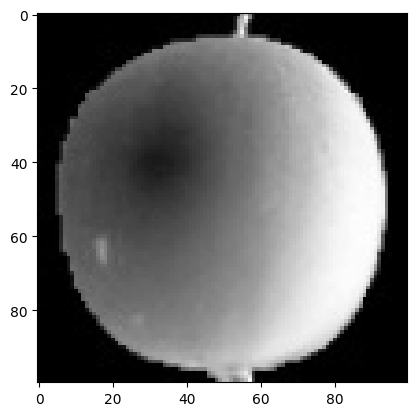

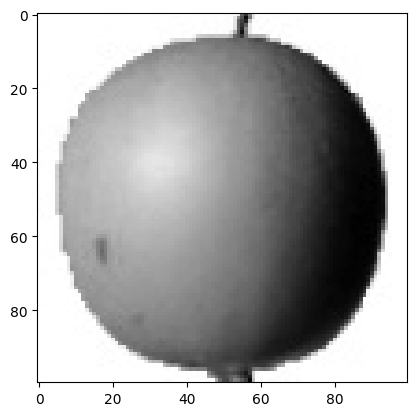

In [44]:
plt.imshow(fruits[0], cmap='gray') # 흑백, 배경 검게
plt.show()
plt.imshow(fruits[0], cmap='gray_r') # 흑백, 반전해서 배경 희게
plt.show()

In [45]:
# 1   2   3   4   5   6   7   8   9  10

# 1   1   1   1   1   1   1   1   1   1
# 1   1   1   1   1   1   2   1   2   2
# 2   2   2   2   1   1   1   1   1   1
# 1   1   2   3   2   1   2   1   1   1
# 1   2   1   3   2   1   3   1   4   1
# 2   5   5   5  19 148 192 117  28   1
# 1   2   1   4   1   1   3   1   1   1
# 1   1   2   2   1   1   1   1   1   1
# 1   1   1   1   1   1   1   1   1   1
# 1   1   1   1   1   1   1   1   1   1

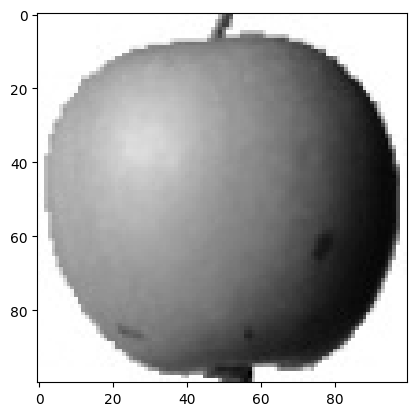

In [47]:
plt.imshow(fruits[50], cmap='gray_r') # 흑백, 반전해서 배경 희게
plt.show()
# 흰색은 0, 어두워질수록 숫자 올라가서 검은색은 255

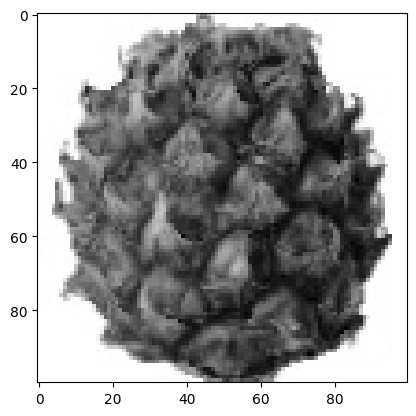

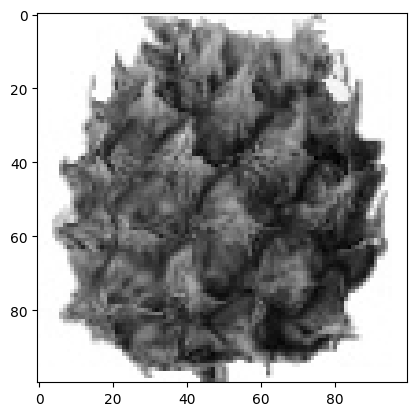

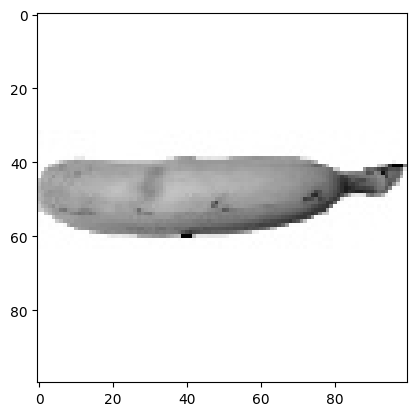

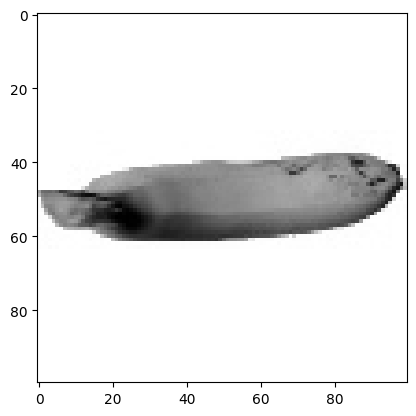

In [52]:
# fruits 에는 사과 100장, 바나나100장, 파인애플 100장 있다
plt.imshow(fruits[100], cmap='gray_r')
plt.show()
plt.imshow(fruits[150], cmap='gray_r')
plt.show()
plt.imshow(fruits[200], cmap='gray_r')
plt.show()
plt.imshow(fruits[250], cmap='gray_r')
plt.show()

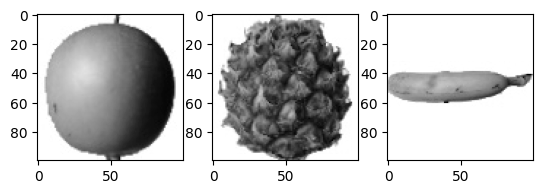

In [56]:
fig, axs = plt.subplots(1, 3)
# subplots() - matplotlib의 함수로 여러개의 graph를 배열처럼 쌓을 수 있게 해준다
# subplots(1,2) - 하나의 행과 2개의 열 -> 반환되는 axs는 2개의 sub graph를 담고 있는 배열이다

axs[0].imshow(fruits[75], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
axs[2].imshow(fruits[200], cmap='gray_r')

plt.show()

In [61]:
# pixel 값 분석을 위해 numpy 배열을 나눌때 100 * 100 image를 펼쳐서 10,000인 1차원 배열로 만든다
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

# 100개씩 선택하기 위해 슬라이싱 연산자 활용 with reshape()
# reshape(-1, ~) -> 자동으로 남은 차원 할당
print(apple.shape) # 사과 사진 100개의 객체에 10,000개의 값
print(pineapple.shape) # 파인애플
print(banana.shape) # 바나나

(100, 10000)
(100, 10000)
(100, 10000)


In [63]:
# mean() 각 사진에 대한 pixel 평균
# axis 중심선(배열의 축) axis=0 행을 따라 계산, axis=1은 열을 따라 계산
# 우리가 필요한 것은 sample의 평균값 (모두 가로로 나열했기때문에 axis=1)
print(apple.mean(axis=1)) # 사과 사진 하나하나에 대한 픽셀 평균이다

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


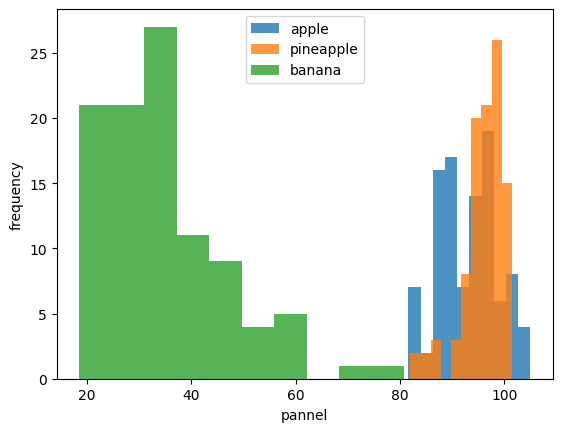

In [73]:
# histogram: 값이 발생한 빈도를 그래프로 표시하기
# x축이 구간(계급), y축은 발생 빈도(도수)
aixs_index = 1
plt.hist(np.mean(apple, axis=aixs_index), alpha=0.8) # alpha=1이면 불투명, 낮아질수록 투명해진다
plt.hist(np.mean(pineapple, axis=aixs_index), alpha=0.8)
plt.hist(np.mean(banana, axis=aixs_index), alpha=0.8)
plt.legend(['apple','pineapple','banana'],) # 범례(순서대로)
plt.xlabel('pannel') # 구간
plt.ylabel('frequency') # 빈도
plt.show()
# 바나나는 길고, 사과나 파인애플은 둥글기 때문에 평균값이 차이가 난다
# banana는 40점대, 파인애플과 사과는 90~100 사이에 많이 있다
# 바바나의 공백이 많기 때문

In [71]:
# 계선해보기 위해서 axis=0으로 해보면?

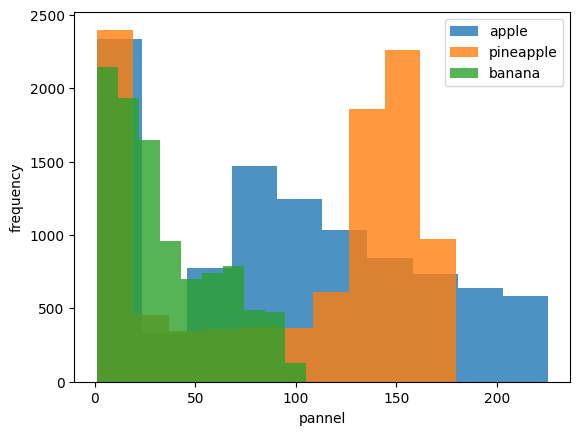

In [76]:
aixs_index = 0
plt.hist(np.mean(apple, axis=aixs_index), alpha=0.8) # alpha=1이면 불투명, 낮아질수록 투명해진다
plt.hist(np.mean(pineapple, axis=aixs_index), alpha=0.8)
plt.hist(np.mean(banana, axis=aixs_index), alpha=0.8)
plt.legend(['apple','pineapple','banana'],) # 범례(순서대로)
plt.xlabel('pannel') # 구간
plt.ylabel('frequency') # 빈도
plt.show()

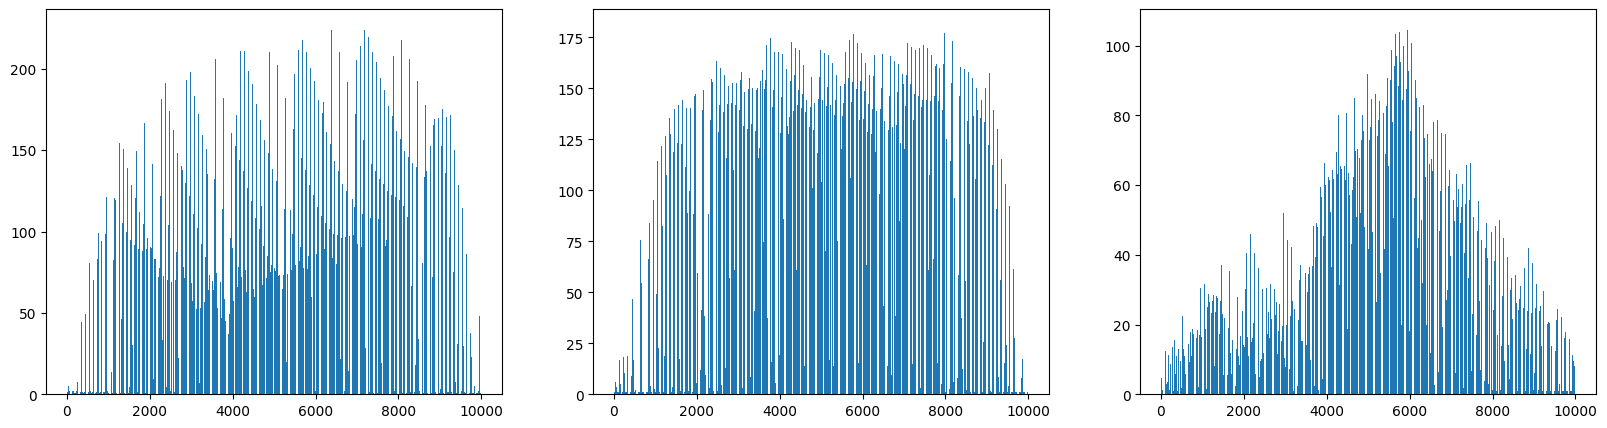

In [110]:
# sample의 평균 값 말고 pixel별 평균 값을 비교해보자 (pixel 값이 높은 위치가 조ㅡㅁ 다르다)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))

plt.show()
# 사과, 파인애플, 바나나 순서(사진을 세로로 자른 모양과 유사하다!?)

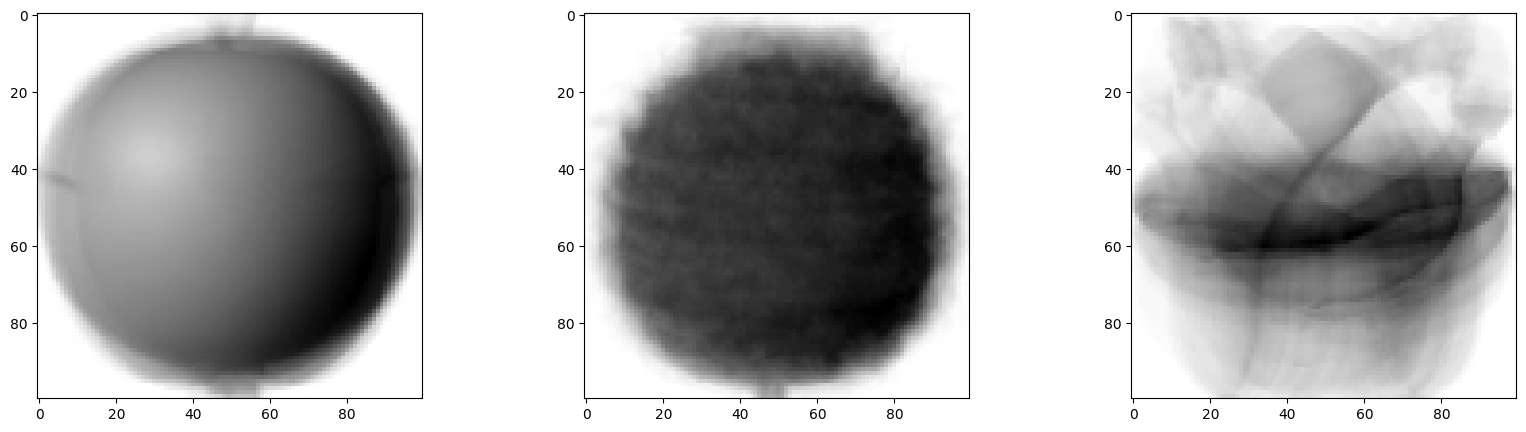

In [111]:
# pixel 평균 값을 100 * 100으로 바꾸고 이미지처럼 출력
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [112]:
# 평균 값과 가장 가까운 사진
abs_diff = np.abs(fruits - apple_mean)
# apple_mean과 가장 가까운 사진을 고르기 위해 절대값 오차 사용해보기
# numpy abs() - 절대값을 계산하는 함수(음수 양수로)
abs_mean = np.mean(abs_diff, axis=(1, 2))
# 배열에 사용하면 모든 원소의 절대값을 계산해서 입력과 동일한 크기의 배열 반환
# np.abs와 np.absolute()는 유사하다
# abs_diff는 300, 100, 100 크기의 배열
# 각 sample에 대한 평균을 구하기 위해 axis에 두번째, 세번째 차원을 모두 지정
print(abs_mean.shape)
# 이렇게 계산한 abs_mean은 각 sample의 오차 평균이다

(300,)


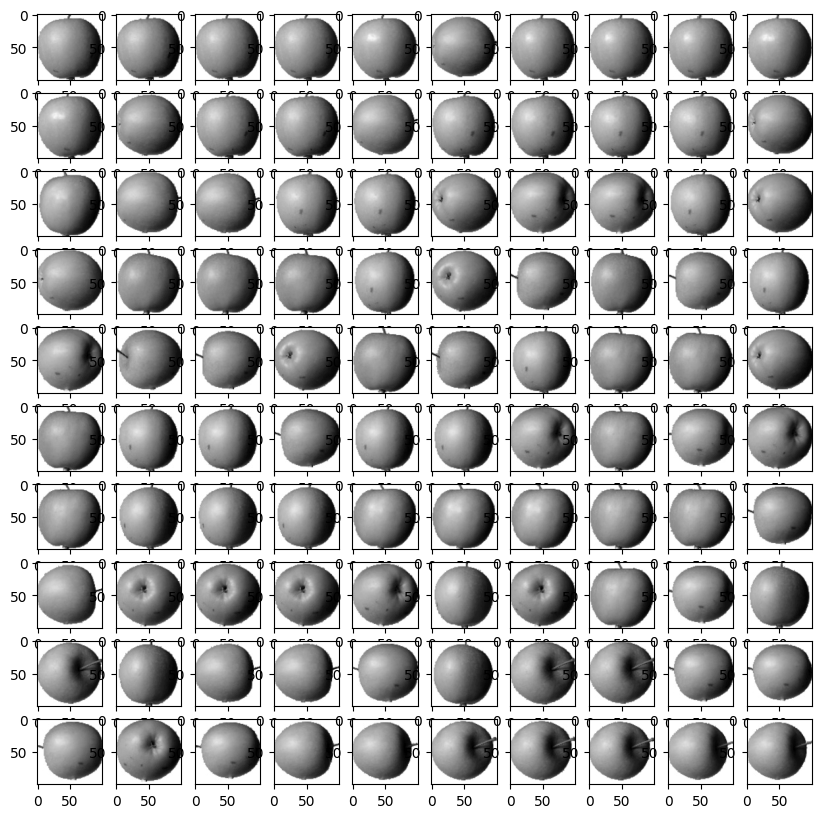

In [113]:
# 이 값이 가장 작은 순서대로 100개 골라보기 -> apple_mean과 오차가 가장 작은 sample 100개를 골라서
# np.argsort() - 작은것에서 큰 순서대로 나열한 abs_mean 배열의 index 반환
# 이 index 중에서 처음 100개를 선택해서 10*10 격자로 이루어진 그래프 그려보기

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
# subplots() 10 * 1, 총 100개의 subgrapg 생성
# figsize=(10,10) -> 그래프 크기 지정(기본 값(8,6))

for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
plt.show()
# axs는 (10,10) 크기의 2차원 배열이기 때문에 i, j 두 첨자를 사용해서 subgraph 위치 지정

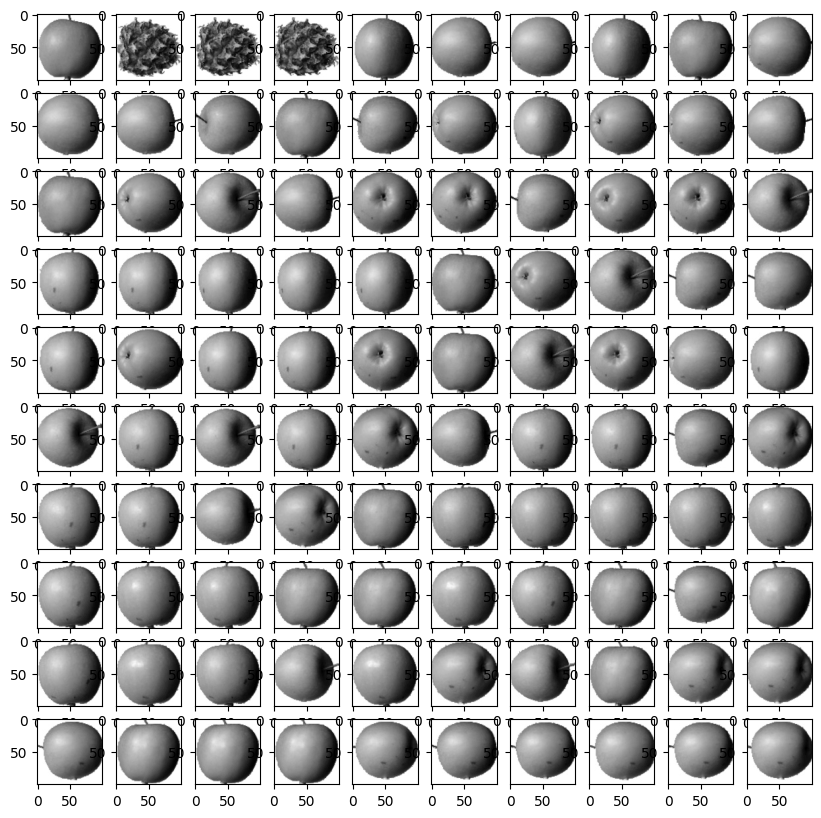

In [114]:
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))

pineapple_index = np.argsort(abs_mean)[100:200]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[pineapple_index[i*10 + j]], cmap='gray_r')
plt.show()

In [115]:
# 지금까지 흑백 사진을 이용해서 pixel 값을 사용하고 과일 사진을 모으는 작업을 진행하였다
# 이렇게 비슷한 sample끼리 group으로 모으는 작업 - clusteruing(군집)
# cluster: 군집 algorism에서 만든 group

# 지금까지는 전처리한 것 - trarget 값을 알고 접근한 것
# 실제 비지도 학습에서는 target값을 모르는 것이 대부분

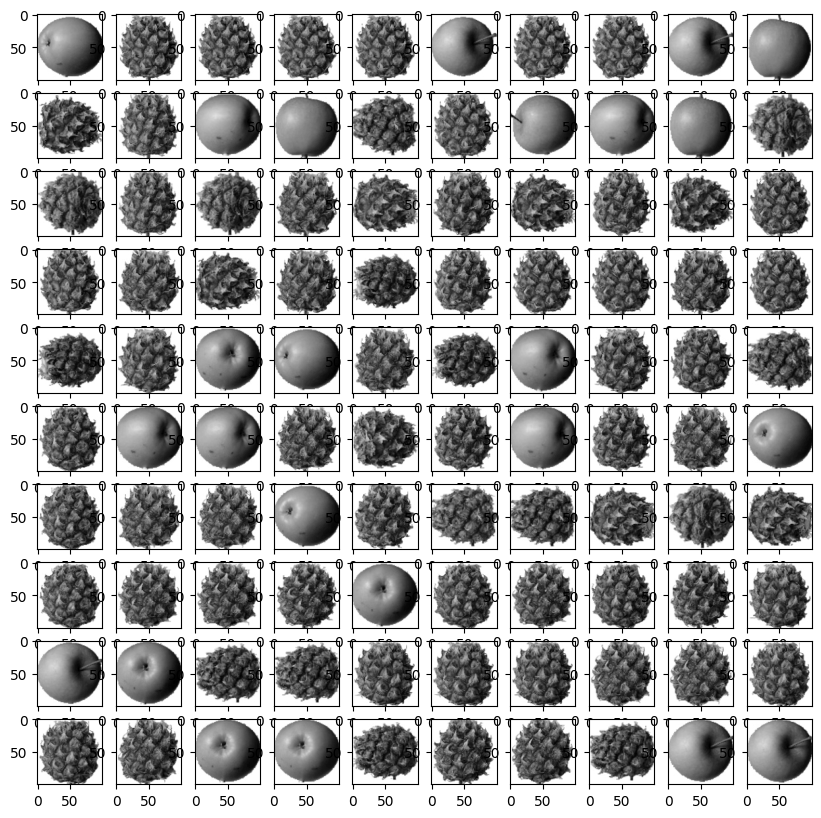

In [116]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
banana_index = np.argsort(abs_mean)[200:300]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
plt.show()